In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


建立facenet embedding模型
Model filename: /content/model_check_point/20180402-114759.pb
facenet embedding模型建立完毕


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


0.787227657421651 0.11661067739977601
1.4502176876534272 0.07649913447941228


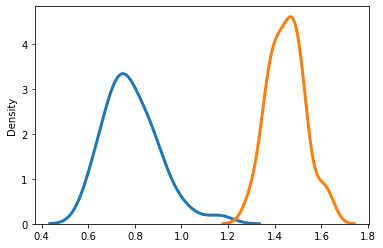

In [ ]:
import tensorflow as tf
import numpy as np
import scipy.misc
import cv2
import facenet
import imageio
import glob
import seaborn as sns
import matplotlib.pyplot as plt

image_size = 160 #don't need equal to real image size, but this value should not small than this
modeldir = '/content/model_check_point/20180402-114759.pb' #change to your model dir
print('build facenet embedding model')
tf.Graph().as_default()
sess = tf.compat.v1.Session()

facenet.load_model(modeldir)
images_placeholder = tf.compat.v1.get_default_graph().get_tensor_by_name("input:0")
embeddings = tf.compat.v1.get_default_graph().get_tensor_by_name("embeddings:0")
phase_train_placeholder = tf.compat.v1.get_default_graph().get_tensor_by_name("phase_train:0")
embedding_size = embeddings.get_shape()[1]
dist_original = []
dist_new = []
print('facenet embedding has been built!')
root_dir = '/content/drive/MyDrive/DL_final/generated_fig3'
image_list = []
for filename in glob.glob(root_dir+"/*.png"): 
  image_list.append(filename)
for name in image_list:
  s = name.split("/")[-1]
  image_mask = '/content/drive/MyDrive/DL_final/with_mask/with-mask-default-mask-'+s 
  image_true = '/content/drive/MyDrive/DL_final/without_mask/'+s 
  scaled_reshape = []

  image1 = imageio.imread(image_mask, pilmode='RGB')
  image1 = cv2.resize(image1, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
  image1 = facenet.prewhiten(image1)
  scaled_reshape.append(image1.reshape(-1,image_size,image_size,3))
  emb_array1 = np.zeros((1, embedding_size))
  emb_array1[0, :] = sess.run(embeddings, feed_dict={images_placeholder: scaled_reshape[0], phase_train_placeholder: False })[0]

  image2 = imageio.imread(image_true, pilmode='RGB')
  image2 = cv2.resize(image2, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
  image2 = facenet.prewhiten(image2)
  scaled_reshape.append(image2.reshape(-1,image_size,image_size,3))
  emb_array2 = np.zeros((1, embedding_size))
  emb_array2[0, :] = sess.run(embeddings, feed_dict={images_placeholder: scaled_reshape[1], phase_train_placeholder: False })[0]

  image_g = imageio.imread(name, pilmode='RGB')
  image_g = cv2.resize(image_g, (image_size, image_size), interpolation=cv2.INTER_CUBIC)
  image_g = facenet.prewhiten(image_g)
  scaled_reshape.append(image_g.reshape(-1,image_size,image_size,3))
  emb_array3 = np.zeros((1, embedding_size))
  emb_array3[0, :] = sess.run(embeddings, feed_dict={images_placeholder: scaled_reshape[2], phase_train_placeholder: False })[0]

  dist_original.append(np.sqrt(np.sum(np.square(emb_array1[0]-emb_array2[0]))))
  dist_new.append(np.sqrt(np.sum(np.square(emb_array3[0]-emb_array2[0]))))

sns.distplot(dist_original, hist = False, kde = True,rug=True,
                 kde_kws = {'linewidth': 3},
                 label = 'Original') 
plt.axvline(x=np.average(dist_original),
            color='blue',ls='--')
sns.distplot(dist_new, hist = False, kde = True,rug=True,
                 kde_kws = {'linewidth': 3},
                 label = 'Generated'  ) 
plt.axvline(x=np.average(dist_new),
            color='orange',ls='--')
plt.legend()
plt.title('Density Plot of Distance of Different Images')
plt.xlabel('Distance')
plt.ylabel('Density');
print(np.average(dist_original),np.std(dist_original))
print(np.average(dist_new),np.std(dist_new))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

Text(0, 0.5, 'Density')

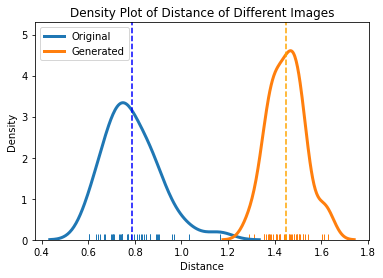

In [ ]:
sns.distplot(dist_original, hist = False, kde = True,rug=True,
                 kde_kws = {'linewidth': 3},
                 label = 'Original') 
plt.axvline(x=np.average(dist_original),
            color='blue',ls='--')
sns.distplot(dist_new, hist = False, kde = True,rug=True,
                 kde_kws = {'linewidth': 3},
                 label = 'Generated'  ) 
plt.axvline(x=np.average(dist_new),
            color='orange',ls='--')
plt.legend()
plt.title('Density Plot of Distance of Different Images')
plt.xlabel('Distance')
plt.ylabel('Density')

In [ ]:
dist_original==dist_new

True